In [1]:
include("../SDF/SerialSDF.jl")
include("../SDF/SDFVis.jl")
include("../SDF/SDFStructs.jl")
include("../SDF/ParallelSDF.jl")
using .SerialSDF
using .SDFVis
using .SDFStructs
using .ParallelSDF

using Plots
using Colors
using Statistics

In [2]:
Threads.nthreads()

12

In [3]:
function benchmark(imgs, iters, func)
    times = zeros((size(imgs,1),iters))
    for i in 1:size(imgs,1)
        @show i
        for j in 1:iters
            times[i,j] = @elapsed func(imgs[i])
        end
    end
    return times
end

benchmark (generic function with 1 method)

In [4]:
resolutions = [256, 512, 1024, 4096, 8192]

5-element Vector{Int64}:
  256
  512
 1024
 4096
 8192

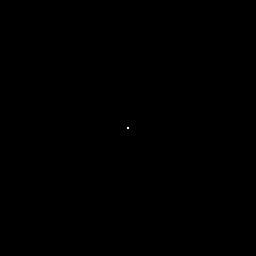

In [5]:
# midpoint benchmarks

function midpoint(size)
    res = zeros(Bool, size, size)
    res[size ÷ 2:size ÷ 2 + 1, size ÷ 2: size÷2+1] .= true
    return res
end

midpoints = [midpoint(i) for i in resolutions]
Gray.(midpoints[1])

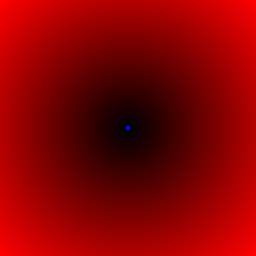

In [6]:
SDFVis.toImageSDF(ParallelSDF.linearSDF2D(midpoints[1]))

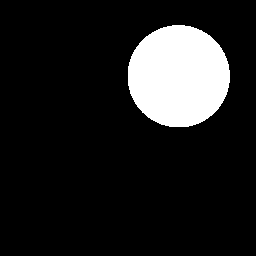

In [7]:
# offset circle benchmarks
function circle(size)
    res = zeros(Bool, size, size)
    for x in 1:size
        for y in 1:size
            dist = sqrt((x-size*0.3)^2 + (y-size*0.7)^2)
            res[x,y] = dist ≤ size * 0.2
        end
    end
    return res
end

circles = [circle(i) for i in resolutions]
Gray.(circles[1])

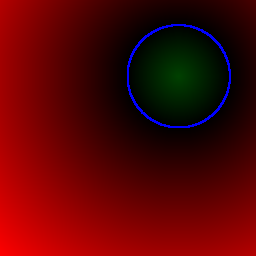

In [8]:
SDFVis.toImageSDF(ParallelSDF.linearSDF2D(circles[1]))

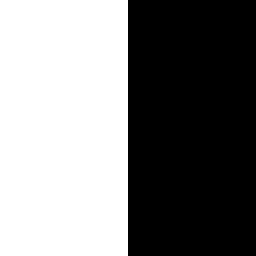

In [9]:
# half benchmark
function half(size)
    res = zeros(Bool, size, size)
    for x in 1:size
        for y in 1:size
            res[y,x] = x ≤ size/2
        end
    end
    return res
end
halves = [half(i) for i in resolutions]
Gray.(halves[1])

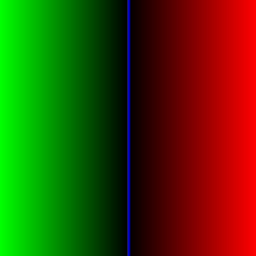

In [10]:
SDFVis.toImageSDF(ParallelSDF.linearSDF2D(halves[1]))

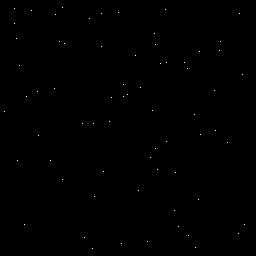

In [11]:
# random isolated dots benchmark
function randimg(size)
    rand(Float64, size, size) .< 0.001
end

randimgs = [randimg(i) for i in resolutions]
Gray.(randimgs[1])

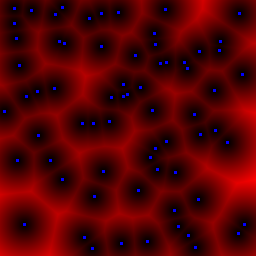

In [12]:
SDFVis.toImageSDF(ParallelSDF.linearSDF2D(randimgs[1]))

In [14]:
midpt_brute_serial = benchmark(midpoints[1:2], 1, SerialSDF.bruteSDF2D)

i = 1
i = 2


2×1 Matrix{Float64}:
  4.8957518
 67.7824811

In [16]:
midpt_brute_parallel = benchmark(midpoints[1:2], 1, ParallelSDF.bruteSDF2D)

i = 1
i = 2


2×1 Matrix{Float64}:
  2.377716
 29.5334853

In [17]:
circle_brute_serial = benchmark(circles[1:2], 1, SerialSDF.bruteSDF2D)

i = 1
i = 2


2×1 Matrix{Float64}:
  4.6128594
 69.8607894

In [18]:
circle_brute_parallel = benchmark(circles[1:2], 1, ParallelSDF.bruteSDF2D)

i = 1
i = 2


2×1 Matrix{Float64}:
  1.6612869
 28.4388328

In [19]:
halves_brute_serial = benchmark(circles[1:2], 1, SerialSDF.bruteSDF2D)

i = 1
i = 2


2×1 Matrix{Float64}:
  5.0149132
 72.6243412

In [20]:
halves_brute_parallel = benchmark(halves[1:2], 1, ParallelSDF.bruteSDF2D)

i = 1
i = 2


2×1 Matrix{Float64}:
  2.1323944
 37.461746

In [80]:
rand_brute_serial = benchmark(randimgs[1:2], 1, SerialSDF.bruteSDF2D)

i = 1
i = 2


2×1 Matrix{Float64}:
   7.7139157
 122.4982236

In [22]:
rand_brute_parallel = benchmark(randimgs[1:2], 1, ParallelSDF.bruteSDF2D)

i = 1
i = 2


2×1 Matrix{Float64}:
  2.1111143
 37.7826545

In [27]:
midpt_dij_serial = benchmark(midpoints[1:4], 1, SerialSDF.dijkstraSDF2D)

i = 1
i = 2
i = 3
i = 4


4×1 Matrix{Float64}:
  0.0743513
  0.3024496
  1.2776058
 27.0210974

In [29]:
midpt_dij_parallel = benchmark(midpoints[1:4], 1, ParallelSDF.dijkstraSDF2DSerialUDF)

i = 1
i = 2
i = 3
i = 4


4×1 Matrix{Float64}:
  0.3283222
  0.2884391
  1.300196
 26.4880635

In [30]:
circ_dij_serial = benchmark(circles[1:4], 1, SerialSDF.dijkstraSDF2D)

i = 1
i = 2
i = 3
i = 4


4×1 Matrix{Float64}:
  0.0962633
  0.3744894
  1.5934043
 32.0228915

In [31]:
circ_dij_parallel = benchmark(circles[1:4], 1, ParallelSDF.dijkstraSDF2DSerialUDF)

i = 1
i = 2
i = 3
i = 4


4×1 Matrix{Float64}:
  0.1281467
  0.4901422
  1.8838249
 31.4129898

In [32]:
half_dij_serial = benchmark(halves[1:4], 1, SerialSDF.dijkstraSDF2D)

i = 1
i = 2
i = 3
i = 4


4×1 Matrix{Float64}:
  0.1884317
  0.6747956
  2.8428843
 60.773338

In [33]:
half_dij_parallel = benchmark(halves[1:4], 1, ParallelSDF.dijkstraSDF2DSerialUDF)

i = 1
i = 2
i = 3
i = 4


4×1 Matrix{Float64}:
  0.0853937
  0.3737265
  1.5884229
 34.3842176

In [35]:
rand_dij_serial = benchmark(randimgs[1:4], 1, SerialSDF.dijkstraSDF2D)

i = 1
i = 2
i = 3
i = 4


4×1 Matrix{Float64}:
  0.1137474
  0.5010234
  3.1641102
 71.8135714

In [34]:
rand_dij_parallel = benchmark(randimgs[1:4], 1, ParallelSDF.dijkstraSDF2DSerialUDF)

i = 1
i = 2
i = 3
i = 4


4×1 Matrix{Float64}:
  0.2695193
  0.518589
  2.6679536
 70.1622212

In [36]:
circle_linear_serial = benchmark(circles, 10, SerialSDF.linearSDF2D)

i = 1
i = 2
i = 3
i = 4
i = 5


5×10 Matrix{Float64}:
 0.0033473  0.0037055  0.0036987  …  0.0037719   0.0038215  0.0038951
 0.0131406  0.0131926  0.0125212     0.0134071   0.0128913  0.0132694
 0.0584698  0.0594477  0.0592832     0.0537817   0.0540461  0.0570701
 1.85447    2.08055    1.95826       2.16648     1.69798    1.65134
 8.29209    8.6278     8.19022       8.43742    10.61       8.76963

In [37]:
circle_linear_parallel = benchmark(circles, 10, ParallelSDF.linearSDF2D)

i = 1
i = 2
i = 3
i = 4
i = 5


5×10 Matrix{Float64}:
 0.0018786  0.0031476  0.0023757  …  0.0032099  0.0032107  0.0032908
 0.0082687  0.153772   0.0081566     0.0087258  0.0072584  0.0071061
 0.0439221  0.0328962  0.0290029     0.029179   0.0296218  0.0298165
 0.977564   0.959929   0.749811      0.790488   0.916997   0.806793
 3.73337    4.31354    4.16418       4.08462    3.95838    4.07635

In [38]:
half_linear_serial = benchmark(halves, 10, SerialSDF.linearSDF2D)

i = 1
i = 2
i = 3
i = 4
i = 5


5×10 Matrix{Float64}:
 0.0034205  0.0051691  0.0057475  …  0.0075978  0.0070244  0.006068
 0.016646   0.116075   0.0173461     0.02122    0.0161663  0.0150689
 0.0589329  0.0588024  0.0610263     0.0597792  0.0564917  0.057449
 1.62659    1.54816    1.68285       1.56127    1.68671    1.67501
 8.42624    8.51772    8.83434       9.37414    7.92873    8.15533

In [39]:
half_linear_parallel = benchmark(halves, 10, ParallelSDF.linearSDF2D)

i = 1
i = 2
i = 3
i = 4
i = 5


5×10 Matrix{Float64}:
 0.0024745  0.0018283  0.0020504  …  0.0025346  0.0041421  0.0036737
 0.0083742  0.122227   0.0076907     0.0064698  0.0067441  0.0058383
 0.0266862  0.0248525  0.0268734     0.0336396  0.0313098  0.0334985
 0.895636   0.780194   0.995666      1.19995    1.01862    0.839052
 3.52924    4.22099    4.00919       4.25732    4.1942     4.17742

In [40]:
rand_linear_serial = benchmark(randimgs, 10, SerialSDF.linearSDF2D)

i = 1
i = 2
i = 3
i = 4
i = 5


5×10 Matrix{Float64}:
 0.0028175  0.002906   0.0039171  …  0.0043518  0.0043871  0.004456
 0.013887   0.111798   0.0146197     0.0169925  0.0141445  0.0149559
 0.0640014  0.0574133  0.0583294     0.060444   0.0593763  0.0619017
 1.51985    1.48719    1.5479        1.42063    1.56566    1.53735
 7.22479    7.46476    7.54224       7.40608    7.37603    7.46381

In [41]:
rand_linear_parallel = benchmark(randimgs, 10, ParallelSDF.linearSDF2D)

i = 1
i = 2
i = 3
i = 4
i = 5


5×10 Matrix{Float64}:
 0.0018929  0.0014716  0.0016122  …  0.002282   0.0032973  0.0031732
 0.0086181  0.100668   0.0066944     0.0074858  0.0093695  0.0075265
 0.0253293  0.0283551  0.0251743     0.0253161  0.0260941  0.0246472
 0.811355   0.707856   0.944185      0.839589   0.826378   0.771547
 3.53975    4.23876    3.99919       4.43263    4.69124    4.31558

In [42]:
midpt_linear_serial = benchmark(midpoints, 10, SerialSDF.linearSDF2D)

i = 1
i = 2
i = 3
i = 4
i = 5


5×10 Matrix{Float64}:
 0.0034435  0.0055723  0.0044907  …  0.0042238  0.0042394  0.0042902
 0.0145353  0.107064   0.015355      0.0169658  0.0164307  0.0165624
 0.0623281  0.0601804  0.0590619     0.0596115  0.0608638  0.0610725
 1.74464    1.66884    1.72473       1.65449    1.68771    1.67706
 7.53541    7.91557    7.73061       7.74551    7.85601    7.7885

In [43]:
midpt_lin_parallel = benchmark(midpoints, 10, ParallelSDF.linearSDF2D)

i = 1
i = 2
i = 3
i = 4
i = 5


5×10 Matrix{Float64}:
 0.0026037  0.0034471  0.0026269  …  0.0042448  0.0041221  0.0039487
 0.0087906  0.102594   0.0089758     0.0060545  0.0057904  0.0075453
 0.028957   0.0311244  0.0265974     0.0265659  0.0283763  0.0266856
 0.90422    0.761119   0.901339      0.867264   0.839543   0.832829
 3.39822    4.10355    4.00801       4.30273    4.10953    4.23189

In [54]:
plot(resolutions, minimum(midpt_linear_serial, dims=2), label="Serial")
plot!(resolutions, minimum(midpt_lin_parallel,dims=2), label="Parallel")
title!("Min Runtime for Midpoint Using Linear Algorithm")
xlabel!("Resolution (px)")
ylabel!("Runtime (s)")
savefig("./midpt lin.png")

"C:\\Users\\ItsYe\\Desktop\\MIT\\2023 Spring\\18.337\\Final Project\\Benchmarking\\midpt lin.png"

In [55]:
plot(resolutions, minimum(circle_linear_serial, dims=2), label="Serial")
plot!(resolutions, minimum(circle_linear_parallel,dims=2), label="Parallel")
title!("Min Runtime for Circle Using Linear Algorithm")
xlabel!("Resolution (px)")
ylabel!("Runtime (s)")
savefig("./circ lin.png")

"C:\\Users\\ItsYe\\Desktop\\MIT\\2023 Spring\\18.337\\Final Project\\Benchmarking\\circ lin.png"

In [56]:
plot(resolutions, minimum(half_linear_serial, dims=2), label="Serial")
plot!(resolutions, minimum(half_linear_parallel,dims=2), label="Parallel")
title!("Min Runtime for Halves Using Linear Algorithm")
xlabel!("Resolution (px)")
ylabel!("Runtime (s)")
savefig("./half lin.png")

"C:\\Users\\ItsYe\\Desktop\\MIT\\2023 Spring\\18.337\\Final Project\\Benchmarking\\half lin.png"

In [57]:
plot(resolutions, minimum(rand_linear_serial, dims=2), label="Serial")
plot!(resolutions, minimum(rand_linear_parallel,dims=2), label="Parallel")
title!("Min Runtime for Random Using Linear Algorithm")
xlabel!("Resolution (px)")
ylabel!("Runtime (s)")
savefig("./rand lin.png")

"C:\\Users\\ItsYe\\Desktop\\MIT\\2023 Spring\\18.337\\Final Project\\Benchmarking\\rand lin.png"

In [66]:
plot(resolutions[1:2], minimum(midpt_brute_serial, dims=2), label="Serial")
plot!(resolutions[1:2], minimum(midpt_brute_parallel,dims=2), label="Parallel")
title!("Min Runtime for Midpoint Using Brute Force Algorithm")
xlabel!("Resolution (px)")
ylabel!("Runtime (s)")
savefig("./midpt brute.png")

"C:\\Users\\ItsYe\\Desktop\\MIT\\2023 Spring\\18.337\\Final Project\\Benchmarking\\midpt brute.png"

In [67]:
plot(resolutions[1:2], minimum(circle_brute_serial, dims=2), label="Serial")
plot!(resolutions[1:2], minimum(circle_brute_parallel,dims=2), label="Parallel")
title!("Min Runtime for Circle Using Brute Force Algorithm")
xlabel!("Resolution (px)")
ylabel!("Runtime (s)")
savefig("./circ brute.png")

"C:\\Users\\ItsYe\\Desktop\\MIT\\2023 Spring\\18.337\\Final Project\\Benchmarking\\circ brute.png"

In [68]:
plot(resolutions[1:2], minimum(halves_brute_serial, dims=2), label="Serial")
plot!(resolutions[1:2], minimum(halves_brute_parallel,dims=2), label="Parallel")
title!("Min Runtime for Halves Using Brute Force Algorithm")
xlabel!("Resolution (px)")
ylabel!("Runtime (s)")
savefig("./half brute.png")

"C:\\Users\\ItsYe\\Desktop\\MIT\\2023 Spring\\18.337\\Final Project\\Benchmarking\\half brute.png"

In [69]:
plot(resolutions[1:2], minimum(rand_brute_serial, dims=2), label="Serial")
plot!(resolutions[1:2], minimum(rand_brute_parallel,dims=2), label="Parallel")
title!("Min Runtime for Random Using Brute Force Algorithm")
xlabel!("Resolution (px)")
ylabel!("Runtime (s)")
savefig("./rand brute.png")

"C:\\Users\\ItsYe\\Desktop\\MIT\\2023 Spring\\18.337\\Final Project\\Benchmarking\\rand brute.png"

In [70]:
plot(resolutions[1:4], minimum(midpt_dij_serial, dims=2), label="Serial")
plot!(resolutions[1:4], minimum(midpt_dij_parallel,dims=2), label="Parallel")
title!("Min Runtime for Midpoint Using Brushfire Force Algorithm")
xlabel!("Resolution (px)")
ylabel!("Runtime (s)")
savefig("./midpt dij.png")

"C:\\Users\\ItsYe\\Desktop\\MIT\\2023 Spring\\18.337\\Final Project\\Benchmarking\\midpt brute.png"

In [71]:
plot(resolutions[1:4], minimum(circ_dij_serial, dims=2), label="Serial")
plot!(resolutions[1:4], minimum(circ_dij_parallel,dims=2), label="Parallel")
title!("Min Runtime for Circle Using Brushfire Force Algorithm")
xlabel!("Resolution (px)")
ylabel!("Runtime (s)")
savefig("./circ dij.png")

"C:\\Users\\ItsYe\\Desktop\\MIT\\2023 Spring\\18.337\\Final Project\\Benchmarking\\circ dij.png"

In [72]:
plot(resolutions[1:4], minimum(half_dij_serial, dims=2), label="Serial")
plot!(resolutions[1:4], minimum(half_dij_parallel,dims=2), label="Parallel")
title!("Min Runtime for Halves Using Brushfire Force Algorithm")
xlabel!("Resolution (px)")
ylabel!("Runtime (s)")
savefig("./half dij.png")

"C:\\Users\\ItsYe\\Desktop\\MIT\\2023 Spring\\18.337\\Final Project\\Benchmarking\\half dij.png"

In [73]:
plot(resolutions[1:4], minimum(rand_dij_serial, dims=2), label="Serial")
plot!(resolutions[1:4], minimum(rand_dij_parallel,dims=2), label="Parallel")
title!("Min Runtime for Random Using Brushfire Force Algorithm")
xlabel!("Resolution (px)")
ylabel!("Runtime (s)")
savefig("./rand dij.png")

"C:\\Users\\ItsYe\\Desktop\\MIT\\2023 Spring\\18.337\\Final Project\\Benchmarking\\rand dij.png"

In [78]:
plot(resolutions[1:2], minimum(circle_brute_serial, dims=2), label="Serial Brute Force")
plot!(resolutions[1:2], minimum(circle_brute_parallel,dims=2), label="Parallel Brute Force")
plot!(resolutions[1:4], minimum(circ_dij_serial, dims=2), label="Serial Brushfire")
plot!(resolutions[1:4], minimum(circ_dij_parallel,dims=2), label="Parallel Brushfire")
plot!(resolutions, minimum(circle_linear_serial, dims=2), label="Serial Linear")
plot!(resolutions, minimum(circle_linear_parallel,dims=2), label="Parallel Linear")

title!("Min Runtime for Circle Using Various Algorithms")
xlabel!("Resolution (px)")
ylabel!("Runtime (s)")
savefig("./rand dij.png")

"C:\\Users\\ItsYe\\Desktop\\MIT\\2023 Spring\\18.337\\Final Project\\Benchmarking\\rand dij.png"

In [81]:
@elapsed zeros((256,256))

0.0003222

In [82]:
@elapsed zeros((512,512))

0.0006505

In [104]:
plot(resolutions[1:4], midpt_dij_serial ./ midpt_dij_parallel, label="")
title!("Serial Divided by Parallel Runtime With Brushfire\nAlgorithm on Midpoint Image")
xlabel!("Resolution (px)")
ylabel!("Runtime (s)")

savefig("./plot.png")

"C:\\Users\\ItsYe\\Desktop\\MIT\\2023 Spring\\18.337\\Final Project\\Benchmarking\\plot.png"

In [105]:
plot(resolutions[1:4], half_dij_serial ./ half_dij_parallel, label="")
title!("Serial Divided by Parallel Runtime With Brushfire\nAlgorithm on Halves Image")
xlabel!("Resolution (px)")
ylabel!("Runtime (s)")

savefig("./plot2.png")

"C:\\Users\\ItsYe\\Desktop\\MIT\\2023 Spring\\18.337\\Final Project\\Benchmarking\\plot2.png"

In [107]:
minimum(circle_linear_serial, dims = 2)

5×1 Matrix{Float64}:
 0.0033473
 0.0125212
 0.053247
 1.4580655
 8.162382

In [108]:
minimum(midpt_linear_serial, dims = 2)

5×1 Matrix{Float64}:
 0.0031015
 0.0142074
 0.0590619
 1.5808649
 7.5354068

In [109]:
minimum(rand_linear_serial, dims = 2)

5×1 Matrix{Float64}:
 0.0028175
 0.013887
 0.0574133
 1.4004645
 7.2247885

In [110]:
minimum(half_linear_serial, dims = 2)

5×1 Matrix{Float64}:
 0.0034205
 0.0150689
 0.0564917
 1.5481555
 7.928729

In [119]:
@time res = zeros(8192, 8192)

  0.273710 seconds (2 allocations: 512.000 MiB, 17.57% gc time)


8192×8192 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

In [120]:
@time res = zeros(512, 512)

  0.000964 seconds (2 allocations: 2.000 MiB)


512×512 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [113]:
0.989006 / 0.000714 

1385.1624649859943

In [114]:
4* 0.000714 /(0.0150689+0.013887+0.0142074+0.0125212)

0.05128895832772136

In [116]:
4 * 0.989006 / (7.5354068+7.2247885+7.928729+8.162382)

0.12822873565000392

In [130]:
plot(resolutions, minimum(midpt_linear_serial,dims=2) ./ minimum(midpt_lin_parallel, dims=2), label="")
title!("Serial Divided by Parallel Runtime With Linear-Time\nAlgorithm on Midpoint Image")
xlabel!("Resolution (px)")
ylabel!("Runtime (s)")

savefig("./linear midpt.png")

"C:\\Users\\ItsYe\\Desktop\\MIT\\2023 Spring\\18.337\\Final Project\\Benchmarking\\linear midpt.png"

In [132]:
@time Array{Int64}(undef, 8192)

  0.000013 seconds (2 allocations: 64.047 KiB)


8192-element Vector{Int64}:
        2102358876240
          17179869186
        2102358876742
           4294967296
        2102358876464
           4294967296
 -3088297230065764943
 -7407773142686400899
 -2021661474613068434
 -2763852922032132937
        2102358876320
          17179869184
 -5477222396993773743
                    ⋮
    29273400161599642
 -1657324216195717120
      256186224541696
    24769799426932824
                    0
       82463376998400
     2814749934878795
  3906362902780578304
  3688503268875778336
     9981362530422784
        2103005285072
        2101670563360

In [135]:
@time zeros(Int64, (8192, Threads.nthreads()))

  0.000300 seconds (2 allocations: 768.047 KiB)


8192×12 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 ⋮              ⋮              ⋮  
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0

In [136]:
0.000300 / 0.000013

23.076923076923077